## Clustering with Same-Cluster Queries
# Introduction
Clustering is a method of partitioning data into different clusters where each cluster holds items that have similar attributes to one another. This is oftentime an unsupervised learning algorithm. Same-Cluster queries allows us as humans to step in and make corrections to a model that has already been developed. Our research will be looking at spectral clustering and how accurate it is and how Same-Cluster Queries can help improve the model. The intial research will be done under synthetic data, in order to remove issues with missing data and have values that demonstrated grounded truth. These were produced by three randomly sampled vectors.

In [496]:
#Packages to import
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as plt
import seaborn as sns
from collections import Counter

In [527]:
#Producing synthetic data
#Producing 3 synthetic clusters into a random space
x = np.random.normal(random.uniform(-1, 1),random.uniform(0.05,0.5),size=(3, 100))
x[0]
vectors = list()
for i in range(len(x)):
    if i == 0:
        arrays = np.random.normal(x[i],0.1, size=(100,100))
        vectors = arrays
    else:
        arrays = np.random.normal(x[i],0.1, size=(100,100))
        vectors = np.concatenate((vectors, arrays))

In [ ]:
def center_calc(vectors):
    #initial centroids and the old centroids both initialized
    init_means = np.array([vectors[np.random.choice(len(vectors),1)],vectors[np.random.choice(len(vectors),1)],vectors[np.random.choice(len(vectors),1)]])
    old_means = np.array([vectors[np.random.choice(len(vectors),1)],vectors[np.random.choice(len(vectors),1)],vectors[np.random.choice(len(vectors),1)]])
    acc_list = []
    #check if the means are unchanged and are equal
    while not (set([tuple(a) for a in init_means]) == set([tuple(a) for a in oldmu])):
        oldmu = init_means
        # Assign all points in X to clusters
        clusters, labels = cluster_points(X, init_means)
        
        accuracy = 0
        used_index = []
        #Calculations for accuracy of the labels
        for step in steps:
            ctr = Counter(labels[step:step+100])
            index = max(list(labels[step:step+100]),key=list(labels[step:step+100]).count)
            if index in used_index:
                index, its_frequency = ctr.most_common(3)[1]
                if index in used_index:
                    index, its_frequency = ctr.most_common(3)[2]
            used_index.append(index)
            count = list(labels[step:step+100]).count(index)
            print(accuracy)
            accuracy = accuracy+count
            
        acc_list.append(accuracy/300)
        
        # Reevaluate centers
        init_means = reevaluate_centers(oldmu, clusters)
    print(acc_list)
    return(init_means, clusters,acc_list)
mean, cluster,acc_list = center_calc(vectors)
labels = np.array(labels)

for i in iterations:
    accuracy = 0
    used_index = []
    for step in steps:
        ctr = Counter(labels[step:step+100])
        index, its_frequency = index, its_frequency = ctr.most_common(3)[0]
        if index in used_index:
            index, its_frequency = ctr.most_common(3)[1]
            if index in used_index:
                index, its_frequency = ctr.most_common(3)[2]
        used_index.append(index)
        count = list(labels[step:step+100]).count(index)
        accuracy = accuracy+its_frequency
    acc_list.append(accuracy/300)
labels

In [403]:
#clustering function

def cluster_points(vectors, means):
    clusters  = {}
    labels = []
    for vec in vectors:
        best_means = min([(i[0], np.linalg.norm(vec-means[i[0]])) \
                    for i in enumerate(means)], key=lambda t:t[1])[0]
        if best_means not in clusters:
            clusters[best_means] = [vec]
            labels.append(best_means)
        else: 
            clusters[best_means].append(vec)
            labels.append(best_means)
    return clusters, labels

#Find new means
def center_recalc(means, clusters):
    new_means = []
    keys = sorted(clusters.keys())
    for k in keys:
        new_means.append(np.mean(clusters[k], axis = 0))
    return new_means


## Modeling
The Lloyd's algorithm was used to estimate the clustering of this synthetic data. This is suitable for this generated data specifically because Lloyd's algorithm works well under data that is uniform and evenly spaced out. This is an iterative process and therefore, a line graph is demonstrated below to demonstrate the accuracy of the model as the iterations continued. Experimenting with this synthetic data, it was a noticeable observation that there would be a decrease in the slope as the accuracy get closer to a hundred percent accurate. One thing that needs to be considered when looking at this data is how I aligned ground truth values with the labels presented. The main idea was to use the most common value of the first 100 labels and to assign it a '0' and then look at the second 100 labels with the remaining two labels looking for the second most common value. This worked relatively well, but perhaps with larger clusters and larger datasets we could run into some trouble misassigning clusters to other values.

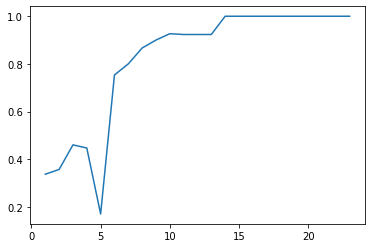

In [227]:
sns.lineplot(range(1, len(acc_list)+1), acc_list)

## Same-Cluster Queries
The thought process for undergoing these 100 queries were to look at two specific cases. One being cases where the vectors are close in terms of their euclidean distance; however, there are in two different clusters. The other case being where the vectors are far apart, but still in the same respective clusters. I split these two cases arbitrarily by having 60 queries to the farthest case ,20 for each cluster, and 40 queries for the closest. There is most likely a way to efficiently partition these two cases looking at the research of importance behind the two cases, but that could be further investigated later.

In [530]:
#100 queries on 300 vectors
#60 queries // 20 queries on each cluster look at vectors that are furthest apart.

#40 queries on cases where vectors in different clusters but close together

In [13]:
vectors

array([[-1.7147402 , -0.99192885,  0.32858903, ...,  0.90777446,
        -0.73922929,  0.09643188],
       [-2.81965521,  0.70839925,  1.09838966, ..., -0.02560401,
        -0.08772242,  2.01182555],
       [-0.32601936, -0.91270517, -0.47241817, ..., -0.1180904 ,
         2.25369364,  0.59136837],
       ...,
       [-0.86261263,  0.50232146,  1.33460679, ..., -1.15007597,
         1.44361056,  1.91818386],
       [-0.44792134,  0.08770393, -0.28472143, ...,  0.10268076,
         0.59027176,  1.25060436],
       [-0.19092299, -1.11820478,  0.40582826, ..., -0.2778077 ,
         1.84201964, -0.36627582]])

In [528]:
#organizing ground truth data so it's easily accessible with a dictionary including the vector, label and index value
ground_truth = dict()
index = 0
step = 0
for j in range(3):
    index = index + 1
    for i in range(100):
        ground_truth[step] = [vectors[i+j*100], index, step]
        step = step + 1
ground_truth[0]

[array([ 1.32041234,  0.99954413,  0.97662371,  0.01490781,  1.34943359,
        -0.1408132 ,  0.14665631,  1.3638809 ,  1.37490499,  0.8145774 ,
         1.35418147,  0.60331565,  0.22218545,  0.75690507,  1.00107893,
         0.99842278,  0.88484598,  0.41807651,  1.3946319 ,  0.52712747,
         1.1323699 ,  0.30969935,  1.54019339,  0.92053295,  1.18170432,
         0.67879347,  0.08156954,  0.66158876,  0.73611356,  0.22346802,
         0.9129674 ,  1.80624164,  1.49157446,  0.79054897,  0.94256688,
         1.29291619,  1.33723356,  0.45440471,  0.6559746 ,  1.26123521,
         1.06238972,  0.75789017,  0.67886392,  0.84240054,  0.65616708,
         1.85945495,  1.92122659,  0.6984343 ,  1.09707182,  1.15872128,
         0.21063914,  0.54680622,  0.92660764,  0.82906701,  0.74526697,
         1.21245845,  0.57912265,  0.50365609,  0.74639703,  0.54817721,
         0.65982105,  1.2423715 ,  0.53896499,  1.15804817,  0.74446265,
         0.71064135,  0.58988857,  0.70839266,  0.2

In [373]:
#For looping through each cluster for the farthest case.
for cluster in range(3):
    #initialize dimensions to compute matrix of euclidean distances.
    m=len(clusters[cluster])
    k=20
    data1 = np.tile(np.array(clusters[cluster])[:, :, np.newaxis], (1, 1, m))
    data2 = np.tile(np.array(clusters[cluster]).T[np.newaxis, :, :], (m, 1, 1))
    
    dist = np.sum(np.square(data1 - data2), axis=1)
    dist[np.tril_indices(m)] = 0
    # find smallest distance for each row
    i = np.arange(m)
    j = np.argmax(dist, axis=1)
    dmax = dist[i, j]
    idx = np.stack((i, j), axis=1)
    # argsort reverse for the max values
    isort = dmax.argsort()[::-1]

    top_idx = idx[isort[:k], :]
    top_dist = np.sqrt(dmin[isort[:k]])
    top_idx
    #checking through pairs and looking to see if they match with the ground data
    for pair in top_idx:
        for check in ground_truth.values():
            if list(check[0]) == list(clusters[cluster][pair[0]]):
                first_val = check[1]
                first_idx = check[2]
            elif list(check[0]) == list(clusters[cluster][pair[1]]):
                second_val = check[1]
                second_idx = check[2]
        print(first_val, second_val)
        if first_val == second_val:
            continue
        if first_idx < 100:
            index = max(list(labels[:100]),key=list(labels[:100]).count)
            if first_val == index:
                labels[second_idx] = index
            labels[first_idx] = index
        elif first_idx < 300:
            index = max(list(labels[200:300]),key=list(labels[200:300]).count)
            if first_val == index:
                labels[second_idx] = index
            labels[first_idx] = index 
        else:
            index = max(list(labels[100:200]),key=list(labels[100:200]).count)
            if first_val == index:
                labels[second_idx] = index
            labels[first_idx] = index 

[-0.97903326 -0.89037069 -0.95772358 -1.21156769 -1.2081699  -0.62996492
 -0.99882373 -0.82933193 -0.99345856 -0.78116271 -1.04904512 -0.80752274
 -1.01685714 -1.00177361 -1.19085181 -1.47151114 -1.01028294 -0.51218058
 -1.11104659 -0.59074444 -0.95635848 -1.18001182 -1.27678661 -0.83128284
 -1.09706098 -1.17974617 -1.1341477  -0.84039497 -1.16819036 -0.97330311
 -1.04373073 -0.57168722 -0.97202397 -1.16894691 -0.67675717 -0.95610824
 -0.99273729 -0.89267672 -0.73415566 -1.10392589 -1.06697508 -0.75887862
 -1.16352316 -0.54375436 -0.90344774 -0.89377924 -0.81007819 -0.95246448
 -0.90600122 -1.27296229 -0.79124165 -0.65570133 -1.00958691 -1.14904852
 -0.78786316 -0.72905975 -1.16546785 -1.00160447 -0.89942149 -0.56836043
 -1.17774384 -0.88740462 -1.14904455 -0.91345657 -1.14185567 -1.04431058
 -0.52199541 -0.85006191 -0.58848627 -0.82338711 -1.11575924 -1.09164137
 -0.88774654 -0.68280798 -1.01336193 -1.00714264 -0.88253173 -0.88061291
 -0.52302493 -0.86321029 -0.96424361 -0.6950213  -0

In [381]:
labels

array([1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2,
       1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2])

In [ ]:
#Same process but with the closest distance for the entire vector set.
m=len(clusters)
k=40
data1 = np.tile(np.array(clusters[cluster])[:, :, np.newaxis], (1, 1, m))
data2 = np.tile(np.array(clusters[cluster]).T[np.newaxis, :, :], (m, 1, 1))

dist = np.sum(np.square(data1 - data2), axis=1)

dist[np.tril_indices(m)] = 0

i = np.arange(m)
j = np.argmin(dist, axis=1)
dmin = dist[i, j]
idx = np.stack((i, j), axis=1)
isort = dmin.argsort()

top_idx = idx[isort[:k], :]
top_dist = np.sqrt(dmin[isort[:k]])
top_idx

for pair in top_idx:
    for check in ground_truth.values():
        if list(check[0]) == list(clusters[pair[0]]):
            first_val = check[1]
            first_idx = check[2]
        elif list(check[0]) == list(clusters[pair[1]]):
            second_val = check[1]
            second_idx = check[2]
    if first_val != second_val:
        continue
    if first_idx < 100:
        index = max(list(labels[:100]),key=list(labels[:100]).count)
        if first_val == index:
            labels[second_idx] = index
        labels[first_idx] = index
    elif first_idx < 300:
        index = max(list(labels[200:300]),key=list(labels[200:300]).count)
        if first_val == index:
            labels[second_idx] = index
        labels[first_idx] = index 
    else:
        index = max(list(labels[100:200]),key=list(labels[100:200]).count)
        if first_val == index:
            labels[second_idx] = index
        labels[first_idx] = index 

## Application
The data used to apply these semi-supervised algorithm is from UCI Machine Repository. This data looked at three varieties of wheat that holds 7 different attributes to each wheat. This dataset was chosen due to it having the same k-value of 3 and having a small number of data, making it easier to handle. The attributes include characteristics of the kernel, area and compactness.

In [444]:
data = np.loadtxt('seeds_dataset.txt', delimiter='\t ', dtype=str)

In [532]:
f = open('seeds_dataset.txt', 'r')

rows = []
for line in f:
    row = line.split()
    row = [float(x) for x in row]
    rows.append(row)

rows[:3]

[[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22, 1.0],
 [14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956, 1.0],
 [14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825, 1.0]]

In [533]:
kmeans = KMeans(n_clusters=3, random_state=0, max_iter = 1, n_init = 1).fit(rows)

In [520]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [521]:
accuracy = 0
used_index = []
acc_list = []
steps = [0,70,140]
for step in steps:
    ctr = Counter(kmeans.labels_[step:step+70])
    index, its_frequency = index, its_frequency = ctr.most_common(3)[0]
    if index in used_index:
        index, its_frequency = ctr.most_common(3)[1]
        if index in used_index:
            index, its_frequency = ctr.most_common(3)[2]
    used_index.append(index)
    count = list(labels[step:step+100]).count(index)
    accuracy = accuracy+its_frequency
acc_list.append(accuracy/210)

In [522]:
acc_list

[0.9285714285714286]

In [523]:
ground_truth = dict()
index = 0
step = 0
for j in range(3):
    index = index + 1
    for i in range(70):
        ground_truth[step] = [rows[i+j*70], index, step]
        step = step + 1

In [ ]:
for i in range(3):
    
    m=len(np.array(rows)[kmeans.labels_ == i])
    #5 queries were made for each cluster due to the dataset being smaller.
    k=5
    data1 = np.tile(np.array(rows)[kmeans.labels_ == i][:, :, np.newaxis], (1, 1, m))
    data2 = np.tile(np.array(rows)[kmeans.labels_ == i].T[np.newaxis, :, :], (m, 1, 1))
    dist = np.sum(np.square(data1 - data2), axis=1)
    dist[np.tril_indices(m)] = 0
    i = np.arange(m)
    j = np.argmax(dist, axis=1)
    dmax = dist[i, j]
    idx = np.stack((i, j), axis=1)
    isort = dmin.argsort()[::-1]

    top_idx = idx[isort[:k], :]
    top_dist = np.sqrt(dmin[isort[:k]])
    top_idx
    print(top_idx)
    new_labels = kmeans.labels_
    for pair in top_idx:
        for check in ground_truth.values():
            if list(check[0]) == list(np.array(rows)[pair[0]]):
                first_val = check[1]
                first_idx = check[2]
            elif list(check[0]) == list(np.array(rows)[pair[1]]):
                second_val = check[1]
                second_idx = check[2]
        print(first_val, second_val)
        if first_val == second_val:
            continue
        if first_idx < 70:
            index = max(list(new_labels[:70]),key=list(new_labels[:70]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index
        elif first_idx < 210:
            index = max(list(new_labels[140:210]),key=list(new_labels[140:210]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index 
        else:
            index = max(list(new_labels[70:140]),key=list(new_labels[70:140]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index 

In [ ]:
for i in range(3):
    
    m=len(np.array(rows)[kmeans.labels_ == i])
    #5 queries were made for each cluster due to the dataset being smaller.
    k=5
    data1 = np.tile(np.array(rows)[kmeans.labels_ == i][:, :, np.newaxis], (1, 1, m))
    data2 = np.tile(np.array(rows)[kmeans.labels_ == i].T[np.newaxis, :, :], (m, 1, 1))
    dist = np.sum(np.square(data1 - data2), axis=1)
    dist[np.tril_indices(m)] = 0
    i = np.arange(m)
    j = np.argmax(dist, axis=1)
    dmax = dist[i, j]
    idx = np.stack((i, j), axis=1)
    isort = dmin.argsort()[::-1]

    top_idx = idx[isort[:k], :]
    top_dist = np.sqrt(dmin[isort[:k]])
    top_idx
    print(top_idx)
    new_labels = kmeans.labels_
    for pair in top_idx:
        for check in ground_truth.values():
            if list(check[0]) == list(np.array(rows)[pair[0]]):
                first_val = check[1]
                first_idx = check[2]
            elif list(check[0]) == list(np.array(rows)[pair[1]]):
                second_val = check[1]
                second_idx = check[2]
        print(first_val, second_val)
        if first_val == second_val:
            continue
        if first_idx < 70:
            index = max(list(new_labels[:70]),key=list(new_labels[:70]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index
        elif first_idx < 210:
            index = max(list(new_labels[140:210]),key=list(new_labels[140:210]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index 
        else:
            index = max(list(new_labels[70:140]),key=list(new_labels[70:140]).count)
            if first_val == index:
                new_labels[second_idx] = index
            new_labels[first_idx] = index 

In [485]:
new_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [534]:
m=len(np.array(rows))
k=20
data1 = np.tile(np.array(rows)[:, :, np.newaxis], (1, 1, m))
data2 = np.tile(np.array(rows).T[np.newaxis, :, :], (m, 1, 1))
dist = np.sum(np.square(data1 - data2), axis=1)
dist[np.tril_indices(m)] = 0
i = np.arange(m)
j = np.argmin(dist, axis=1)
dmin = dist[i, j]
idx = np.stack((i, j), axis=1)
isort = dmin.argsort()

top_idx = idx[isort[:k], :]
top_dist = np.sqrt(dmin[isort[:k]])
top_idx

for pair in top_idx:
    for check in ground_truth.values():
        if list(check[0]) == list(np.array(rows)[pair[0]]):
            first_val = check[1]
            first_idx = check[2]
        elif list(check[0]) == list(np.array(rows)[pair[1]]):
            second_val = check[1]
            second_idx = check[2]
    if first_val != second_val:
        print('pass')
        continue
    print('check')
    if first_idx < 70:
        index = max(list(new_labels[:70]),key=list(new_labels[:70]).count)
        if first_val == index:
            new_labels[second_idx] = index
        new_labels[first_idx] = index
    elif first_idx < 210:
        index = max(list(new_labels[140:210]),key=list(new_labels[140:210]).count)
        if first_val == index:
            new_labels[second_idx] = index
        new_labels[first_idx] = index 
    else:
        index = max(list(new_labels[70:140]),key=list(new_labels[70:140]).count)
        if first_val == index:
            new_labels[second_idx] = index
        new_labels[first_idx] = index 

TypeError: 'numpy.int32' object is not iterable

In [494]:
new_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [526]:
accuracy = 0
used_index = []
acc_list = []
steps = [0,70,140]
for step in steps:
    ctr = Counter(new_labels[step:step+70])
    index, its_frequency = index, its_frequency = ctr.most_common(3)[0]
    if index in used_index:
        index, its_frequency = ctr.most_common(3)[1]
        if index in used_index:
            index, its_frequency = ctr.most_common(3)[2]
    used_index.append(index)
    count = list(new_labels[step:step+70]).count(index)
    accuracy = accuracy+its_frequency
acc_list.append(accuracy/210)

acc_list

[0.9285714285714286]

There was one change made in both the farthest case and nearest case. This could be why the accuracy did not change. There are many reasons that could account for this. The most critical reason could be due to the size of the dataset, there's not enough variance cases to look at. Moreover, the assumption was made that this dataset was evenly split up into the clusters, which is improbable. For this semi-supervised algorithm to work it is necessary to have labels on these points and ground truth values in order to harness the efficiency of this algorithm.

Another important observation is the process of the aftermath of these queries. The intution was to assume if they were supposed to be equal then one would be in the incorrect cluster and would check through that. However, with the number of clusters being more than 2, it is important to note that both vectors, although improbable, could be both in incorrect clusters.

## Literature
Nir Alon did research on this topic and performed the number of queries based on number of clusters, which was interesting to observe. This suggests that the size of the dataset is independent to these queries. Their query algorithm was based on a D^2 sampling algorithm. Their methods tended more towards looking at probability boundaries, which seems appropriate when we look at a uniform dataset like our synthetic data.

## Citations
- UCI Machine Learning Repository: Seeds Data Set, archive.ics.uci.edu/ml/datasets/seeds. 
- Ailon, Nils, et al. Approximate Clustering with Same-Cluster Queries. 
- datasciencelab, Written by, and Written by. “Clustering With K-Means in Python.” The Data Science Lab, 22 Apr. 2014, datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/. 